# Descriptive analysis of applied data

In [1]:
%load_ext autoreload
%autoreload 2
%cd D:\mobi-social-segregation-se

D:\mobi-social-segregation-se


In [51]:
# Load libs
import patchworklib as pw
import pandas as pd
from statsmodels.stats.weightstats import DescrStatsW
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
sns.set_palette(sns.color_palette("colorblind"))
font = {'size': 14}
mpl.rc('font', **font)

In [3]:
df_exp = pd.read_parquet('results/data4model_individual.parquet')
df_exp = df_exp.loc[(df_exp['weekday'] == 1) & (df_exp['holiday'] == 0), :]

In [4]:
cols = ['uid', 'region', 'wt_p',
        'Lowest income group', 'car_ownership', 'radius_of_gyration',
        'cum_jobs', 'cum_stops',
        'ice_birth_resi', 'ice_birth']
df_exp = df_exp[cols]

In [5]:
df_exp.loc[:, 'wt_p'] /= 1000

In [37]:
def plot_seg_data(df_exp, var=None, xlb=None,
                  ylab='Weighted individual count ($\\times$10$^3$)', bins=50,
                  ylog=False, xlog=False, kde=False):
    h = sns.histplot(data=df_exp, x=var, weights='wt_p', bins=bins, kde=kde, fill=True, element='step')
    wdf = DescrStatsW(df_exp[var], weights=df_exp['wt_p'], ddof=1)
    sts = wdf.quantile([0.50])
    q50 = sts.values[0]
    h.axvline(q50, label="Median (weighted) = %.2f"%q50)
    if ylog:
        h.set_yscale('log')
    if xlog:
        h.set_xscale('log')
    h.set_xlabel(xlb)
    h.set_ylabel(ylab)
    h.legend(loc='upper right', bbox_to_anchor=(1, 1.1), frameon=False)
    return h

## 1. Share of lowest income

In [61]:
df_exp.loc[df_exp['Lowest income group'] == 0, 'wt_p'].sum() / df_exp.wt_p.sum() * 100

13.033722509883953

In [62]:
df_exp.loc[df_exp['Lowest income group'] == 1, 'wt_p'].sum() / df_exp.wt_p.sum() * 100

0.9189886287705941

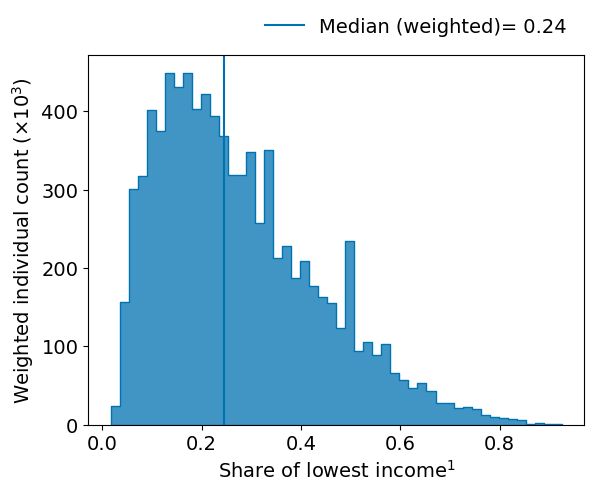

In [38]:
g1 = plot_seg_data(df_exp.loc[(df_exp['Lowest income group'] > 0) & (df_exp['Lowest income group']<1), :],
                   var='Lowest income group',
                   xlb='Share of lowest income$^1$')
plt.show()

## 2. Car ownership

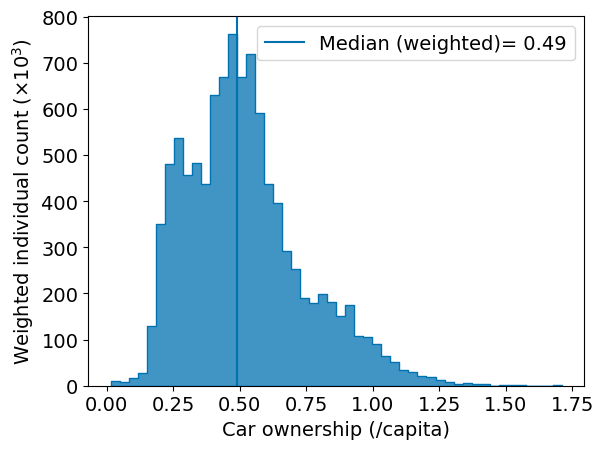

In [17]:
g2 = plot_seg_data(df_exp,
                   var='car_ownership',
                   xlb='Car ownership (/capita)')
plt.show()

## 3. Mobility range

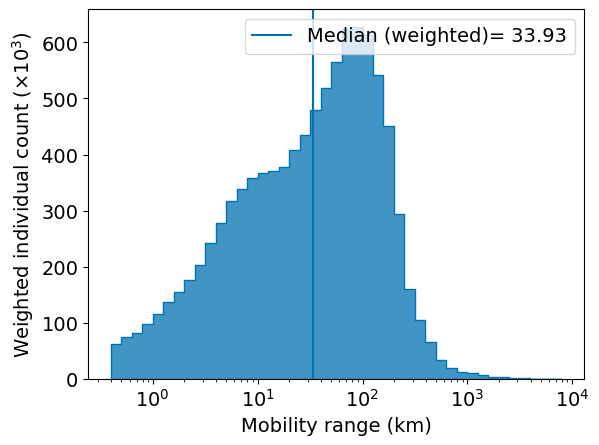

In [18]:
g3 = plot_seg_data(df_exp,
              var='radius_of_gyration',
              xlb='Mobility range (km)',
              bins=[10**(x/10) for x in range(-4, 40)],
              xlog=True)
plt.show()

## 4. Job accessibility by car

In [116]:
df_exp.loc[df_exp['cum_jobs'] == 0, 'wt_p'].sum() / df_exp.wt_p.sum() * 100

0.008698478565095724

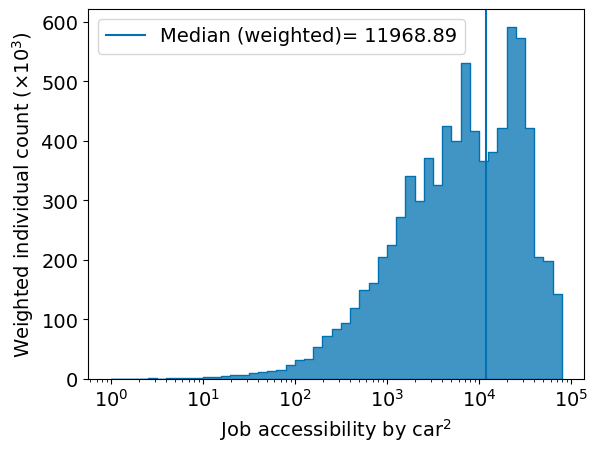

In [19]:
g4 = plot_seg_data(df_exp,
              var='cum_jobs',
              xlb='Job accessibility by car$^2$',
              bins=[10**(x/10) for x in range(0, 50)],
              xlog=True)
plt.show()

## 5. Transit accessibility by walk

In [118]:
df_exp.loc[df_exp['cum_stops'] == 0, 'wt_p'].sum() / df_exp.wt_p.sum() * 100

6.9155490506968125

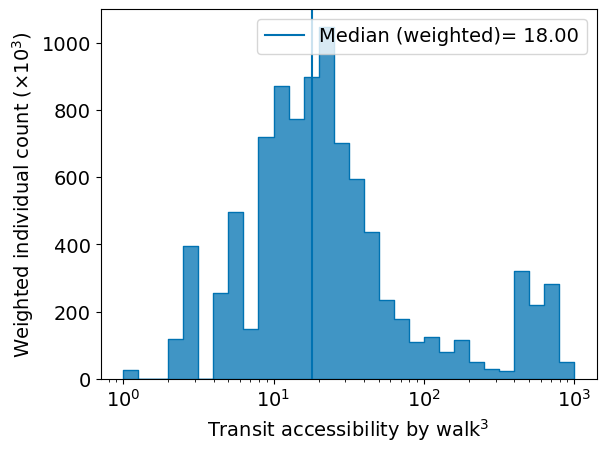

In [20]:
g5 = plot_seg_data(df_exp,
              var='cum_stops',
              xlb='Transit accessibility by walk$^3$',
              bins=[10**(x/10) for x in range(0, 31)],
              xlog=True)
plt.show()

## 6. Residential vs. experienced segregation

In [120]:
df2plot = pd.melt(df_exp, id_vars=['wt_p'], value_vars=['ice_birth_resi', 'ice_birth'])
df2plot.head()

,wt_p,variable,value
0,0.084429,ice_birth_resi,0.324146
1,0.026754,ice_birth_resi,-0.333176
2,0.040516,ice_birth_resi,0.561279
3,0.013445,ice_birth_resi,-0.072044
4,0.054882,ice_birth_resi,0.057772


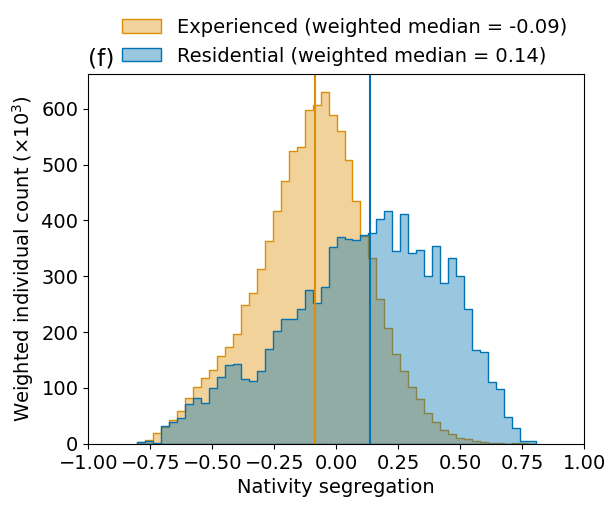

In [58]:
colors = sns.color_palette("colorblind", 2)
h = sns.histplot(data=df2plot, x='value', weights='wt_p', hue='variable',
             hue_order=['ice_birth_resi', 'ice_birth'],
             bins=50, kde=False, fill=True, alpha=alpha, element='step')
wdf = DescrStatsW(df_exp['ice_birth'], weights=df_exp['wt_p'], ddof=1)
sts = wdf.quantile([0.50])
q501 = sts.values[0]
wdf = DescrStatsW(df_exp['ice_birth_resi'], weights=df_exp['wt_p'], ddof=1)
sts = wdf.quantile([0.50])
q502 = sts.values[0]
h.axvline(q501, color=colors[1])
h.axvline(q502, color=colors[0])
h.legend(labels=["Experienced (weighted median = %.2f)"%q501,
                 "Residential (weighted median = %.2f)"%q502],
         loc='upper right', bbox_to_anchor=(1, 1.2), frameon=False)
h.set_xlim(-1, 1)
h.set(xlabel='Nativity segregation', ylabel=ylb)
h.set_title('(f)', loc = "left")
plt.show()